In [1]:
%matplotlib widget
import os, sys, json
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import dates
import pickle as pkl
import ipywidgets as widget
from ipywidgets import interact
import ipydatetime
import datetime
import numpy as np
from datetime import datetime, timezone

def get_day_hour(date):
    if "T" in date:
        start = date.split('_')[0][:-1]
        stop = date.split('_')[1][:-1]
        start_day = datetime.strptime(start,"%Y%m%dT%H%M%S").strftime(f"%Y/%m/%d %H:%M")
        stop_day = datetime.strptime(stop,"%Y%m%dT%H%M%S").strftime(f"%Y/%m/%d %H:%M")
        time_interval = start_day+" -> "+stop_day
    else:
        time_interval = "no time cuts"
        
    
    return time_interval

In [2]:
def get_day_hour(date):
    start = date.split('_')[0][:-1]
    stop = date.split('_')[1][:-1]
    start_day = datetime.strptime(start,"%Y%m%dT%H%M%S").strftime(f"%Y/%m/%d %H:%M")
    stop_day = datetime.strptime(stop,"%Y%m%dT%H%M%S").strftime(f"%Y/%m/%d %H:%M")
    
    return start_day+" -> "+stop_day

In [3]:
exp         = 'l60'
period      = 'p01'
datatype    = 'phy'
foldername  = 'out'

pkl_name = exp + '-' + period

pkl_files = os.listdir(f'{foldername}/pkl-files/par-vs-time/')
pkl_files = [file for file in pkl_files if 'pkl' in file] 

runs = list(dict.fromkeys([file.split('-')[2] for file in pkl_files]))
print("Available runs: ", runs)

geds_list = [file for file in pkl_files if 'string' in file if 'pulser' not in file]      # geds: grouped by string
geds_list_with_date = [file for file in geds_list if 'Z_' in file]
spms_list = [file for file in pkl_files if 'string' not in file if 'pulser' not in file]  # spms: everything not grouped by string
puls_list = [file for file in pkl_files if 'pulser' in file]  # pulser: ch000

# geds
if geds_list != []:
    # configuration
    geds_map = list(dict.fromkeys([file.split('-')[-1].split('.')[0] for file in geds_list]))
    # parameters
    geds_par = list(dict.fromkeys([file.split('-')[-2] for file in geds_list]))
    geds_date = sorted(list(dict.fromkeys([file.split('-')[4] for file in geds_list_with_date])))

    print("\ngeds map:", geds_map)
    print("geds par:", geds_par)
else: 
    geds_map = geds_par = geds_date = []
    print("\n-> NO data for geds were found")

geds_date_formatted = [get_day_hour(date) for date in geds_date]
geds_time_option = [(key, value) for key,value in zip(geds_date_formatted, geds_date)]
geds_time_option.append(("all", "all"))
print("Time intervals:", geds_time_option)

Available runs:  ['r026']

geds map: ['string1']
geds par: ['baseline']
Time intervals: [('2022/09/19 08:00 -> 2022/09/19 10:00', '20220919T080000Z_20220919T100000Z'), ('2022/09/19 08:00 -> 2022/09/19 12:00', '20220919T080000Z_20220919T120000Z'), ('all', 'all')]


In [4]:
if geds_date!=[]:
    # select widget for selecting the date (for geds) 
    geds_time_select = widget.Select(
        options=geds_time_option,
#        value=geds_time_option[0],
        # rows=10,
        description='Time:',
        disabled=False,
        layout={'width': 'max-content'}
)
    

    
# slider for z-axis range
zrange_slider = widget.FloatRangeSlider(
    #min=-50000, max=50000, step=1000, value=[-500,500], 
    min=-1000000, max=1000000, step=1, value=[-1000000,1000000], 
    readout_format='d', 
    description='z-axis range',
    width='1000px'
)

# slider for 3D angle view
elevation_slider = widget.IntSlider(
    min=-360, max=360, step=5, value=20,
    description='Elevation angle [°]:',
    style={'description_width': 'initial'}
)

azimuth_slider = widget.IntSlider(
    min=-360, max=360, step=5, value=-60,
    description='Azimuth angle [°]:',
    style={'description_width': 'initial'}
)

# tab for selecting parameters to plot (for geds)
run_button = widget.ToggleButtons(
    options= runs,
    description='Run:',
    disabled=False,
    button_style='',
    tooltips=[]
)

# tab for selecting parameters to plot (for geds)
par_geds_buttons = widget.ToggleButtons(
    options= geds_par,
    description='Parameter:',
    disabled=False,
    button_style='',
    tooltips=[]
)



# par-vs-time
geds_map_buttons = widget.ToggleButtons(
    options= geds_map,
    description='String #:',
    disabled=False,
    button_style='',
    tooltips=[],
) 


# run widget
run_button = widget.ToggleButtons(
    options= runs,
    description='Run:',
    disabled=False,
    button_style='',
    tooltips=[]
)

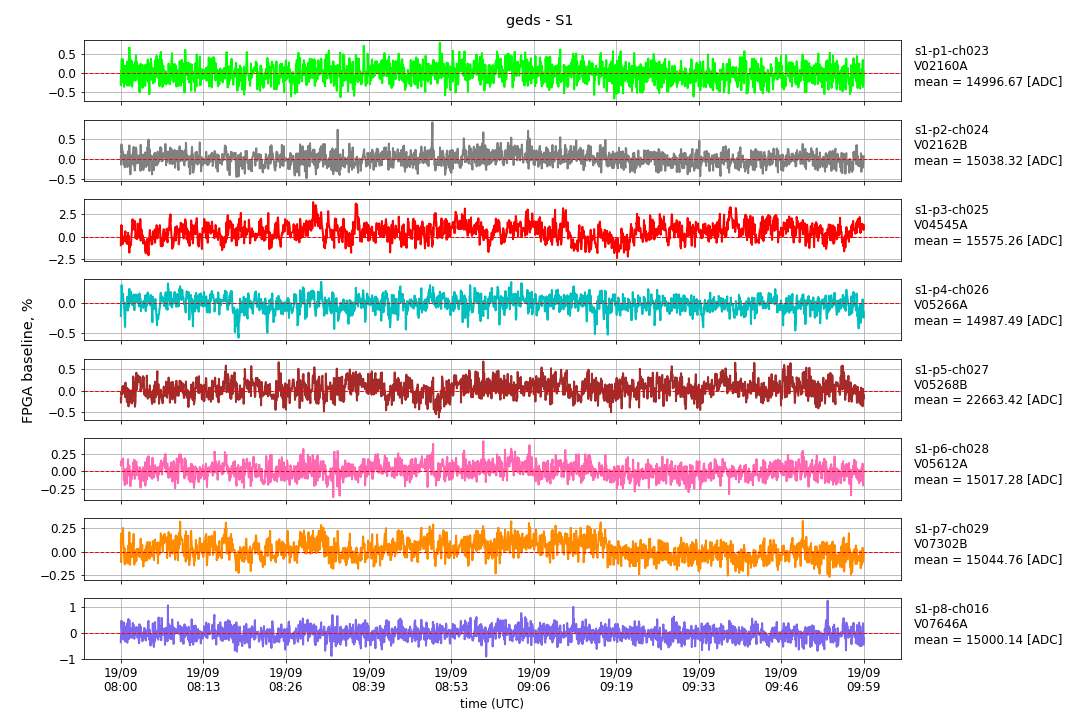

In [5]:
def plot_geds_3D(zrange, elevation, azimuth, time_select, parameter, string, run):
    if time_select == 'all':
        ax = pkl.load(open(f'{foldername}/pkl-files/par-vs-time/{pkl_name}-{run}-{datatype}-{parameter}-{string}.pkl', 'rb'))
    else:
        ax = pkl.load(open(f'{foldername}/pkl-files/par-vs-time/{pkl_name}-{run}-{datatype}-{time_select}-{parameter}-{string}.pkl', 'rb'))
#    ax.set_zlim3d(zrange)
    ax.figure.set_size_inches(14,8)
#    z_lim = ax.get_zlim()
#    ax.view_init(elevation, azimuth) # <- to rotate the plot
    plt.subplots_adjust(left=0.1, right = 0.8,  top= 1)
    plt.show()
  

out_geds = widget.interactive_output(plot_geds_3D, {'zrange': zrange_slider,
                                                    'elevation': elevation_slider,
                                                    'azimuth': azimuth_slider,
                                                    'time_select': geds_time_select,
                                                    'parameter': par_geds_buttons, 
                                                    'string': geds_map_buttons,
                                                    'run': run_button})

form_items = [
    widget.VBox([geds_time_select]),
    widget.VBox([run_button, par_geds_buttons, geds_map_buttons]),            
    widget.VBox([zrange_slider]),
    widget.VBox([elevation_slider, azimuth_slider]),
    out_geds
        ]

widget.VBox(form_items)